<a href="https://colab.research.google.com/github/anderson02aa/Pos_de_IA_na_UFV-2024/blob/main/ELT574_11850_3_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><center><b>[Atividade2-Pós_UFV]-ELT 574-APRENDIZADO_DE_MaQUINA</b></center></H1>
<p>
*   Nome: Anderson Alves de Albuquerque<br>
*   Data: junho de 2024<br>
*   Professor(es): Rodolpho Neves.<br>
*   Este trabalho foi realizado para compor a avaliação (nota) na disciplina APRENDIZADO_DE_MaQUINA da Pós-graduação em IA.
</p><br>



<p><h9>OBS1: a URL do <i>notebook</i> desse projeto no Colab é <a href="https://colab.research.google.com/drive/1ACG8vOb1OHlvWAk2f21vYhwvxut_HNAp?usp=sharing">https://colab.research.google.com/drive/1ACG8vOb1OHlvWAk2f21vYhwvxut_HNAp?usp=sharing</a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a URL do <i>notebook</i> desse projeto no GitHub é <a href="https://github.com/anderson02aa/Pos_de_IA_na_UFV-2024/blob/main/ELT574_11850_3_Atividade_2.ipynb">https://github.com/anderson02aa/Pos_de_IA_na_UFV-2024/blob/main/ELT574_11850_3_Atividade_2.ipynb</a></h9></p>

# <b>0. Definição do Problema</b>

##<b>0.1. Definições do projeto:</b>


<p align="justify">&emsp;O <i>dataset</i> utilizado é o Iris que está nas bibliotecas do Python.
</p>


<p><b>Enunciado desta atividade 2:</b></p>
<p align="justify">&emsp;Crie um Notebook no Google Colab com o nome [ ELT574 < Matrícula > Atividade 2 ], modificando o campo < Matrícula > pela sua matrícula do Sapiens (Exemplo: ELT574 12700-0 Atividade 2). Conforme o roteiro abaixo, utilizando as bibliotecas que foram comentadas na aula síncrona, faça a análise do dataset  Iris para que seja preparada para o ajuste de modelos de aprendizado de máquina, conforme o roteiro abaixo:</p>

<p align="justify">&emsp;Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [3, 1.5] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.</p>


<p align="justify">&emsp;Ajuste modelos de SVMs não lineares com funções Kernel Polinomial e Gaussiana para os dados do Item 2 (com a presença da nova amostra). Explique o que acontece com o hiperplano de separação para cada uma das funções Kernel utilizadas.</p>


<p align="justify">&emsp;Ajuste um modelo de SVM não linear com função Kernel Gaussiana para os valores de gamma = 0.1, 1 e 10, e valores de C = 1, 10, 100 e 1000. O que acontece ao aumentar o valor de cada parâmetro da função gaussiana? Como estes aumentos afetam a classificação de amostras do problema?</p>


<p align="justify">&emsp;Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.
</p>

##<b>0.2. Atributos do <i> dataset</i>:</b>

<p align="justify">&emsp;Serão utilizados apenas as variáveis 'petal length in cm' e 'petal width in cm' no tocante as dados de entrada. Ademais, será utilizada a variável alvo (saída) que é a classificação das flores.</p>

##<b>0.3. Código em python para importação de bibliotecas:</b>

</p><p align="justify">&emsp;Instalando alguns pacotes que são necessários antes da importação de bibliotecas:</p>

In [49]:
# Instalando Pacotes
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

</p><p align="justify">&emsp;Importando bibliotecas que serão necessárias durante este trabalho:</p>

In [50]:
############################################################################
# Imports das bibliotecas Pandas, Numpy, Missingno, Searborn e Metaplotlib.
############################################################################
## NumPy para manipular matrizes e vetores
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print('Setup completo!')

Setup completo!



##<br><b>0.4. Exibição de <i>warnings:</i></b>

<p align="justify">&emsp;Configuração para não exibir os <i><u>warnings</u></i> durante execução de comandos.</p>


In [51]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#<b>1. Questão 1:</b>

##<b><i>1.1. Carregando <i>dataset</i> Iris</i></b>

In [52]:
# Carregando o dataset Iris
iris = load_iris()
X = iris.data[:, [2, 3]]  # Usando apenas as variáveis 'petal length in cm' e 'petal width in cm'
y = iris.target

In [53]:
# mostrando alguns registros de X:
X[1:6,]

array([[1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4]])

In [54]:
# mostrando alguns registros de y:
y[1:6,]

array([0, 0, 0, 0, 0])

##<b>1.2. Dividindo conjunto de treino:</b>

In [55]:
# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##<br><b><i>1.3. Ajustando o modelo de SVM:</b>

In [56]:
# Ajustando o modelo de SVM de margens rígidas
svm_rigid = SVC(kernel='linear', C=1000)
svm_rigid.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

##<b>1.4. Adicionar amostras</b>

In [57]:
# Adicionando a nova amostra [3, 1.5] do tipo Iris setosa
new_sample = np.array([[3, 1.5]])
y_new = [0]  # Classe Iris setosa
X_train_new = np.concatenate((X_train, new_sample), axis=0)
y_train_new = np.concatenate((y_train, y_new), axis=0)

##<b>1.5. Ajustando o modelo de SVM de margens rígidas com a nova amostra:</b>

In [58]:
# Ajustando o modelo de SVM de margens rígidas com a nova amostra
svm_rigid_new = SVC(kernel='linear', C=1000)
svm_rigid_new.fit(X_train_new, y_train_new)

SVC(C=1000, kernel='linear')

##<b>1.6. Criando gráfico(s):</b>

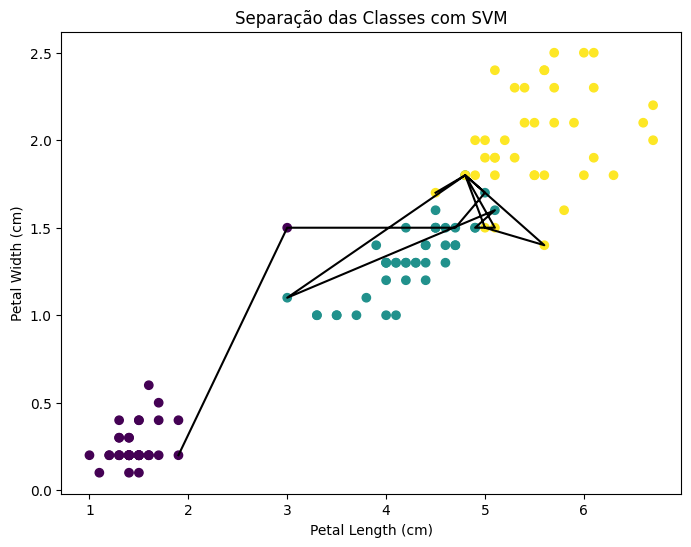

In [66]:
# Criando um gráfico 2D para visualizar a separação das classes
plt.figure(figsize=(8, 6))

# Plotando a fronteira de separação do modelo
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train_new, cmap='viridis')
plt.plot(svm_rigid_new.support_vectors_[:, 0], svm_rigid_new.support_vectors_[:, 1], 'k-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM')
plt.show()

##<b>1.7. Comentário:</b>

<p align="justify">&emsp;<b><font size=3 color=#881100>Com uma nova amostra [3, 1.5] a margem rígida da SVM é forçada a se ajustar. Em seguida, as margens rígidas tentam classificar todas as amostras, mesmo que seja necessário reduzir a sua margem de separação.
</font></b>

#<b>2. Ajuste do modelo SVM de margens suaves:</b>

##<b>2.1. Ajustando para margens suaves:</b>

In [59]:
# Ajustando modelos de SVM de margens suaves
svm_soft_1 = SVC(kernel='linear', C=1)
svm_soft_1.fit(X_train_new, y_train_new)

svm_soft_10 = SVC(kernel='linear', C=10)
svm_soft_10.fit(X_train_new, y_train_new)

svm_soft_100 = SVC(kernel='linear', C=100)
svm_soft_100.fit(X_train_new, y_train_new)

svm_soft_1000 = SVC(kernel='linear', C=1000)
svm_soft_1000.fit(X_train_new, y_train_new)

SVC(C=1000, kernel='linear')

##<b>2.2. Desenhar gráficos:</b>

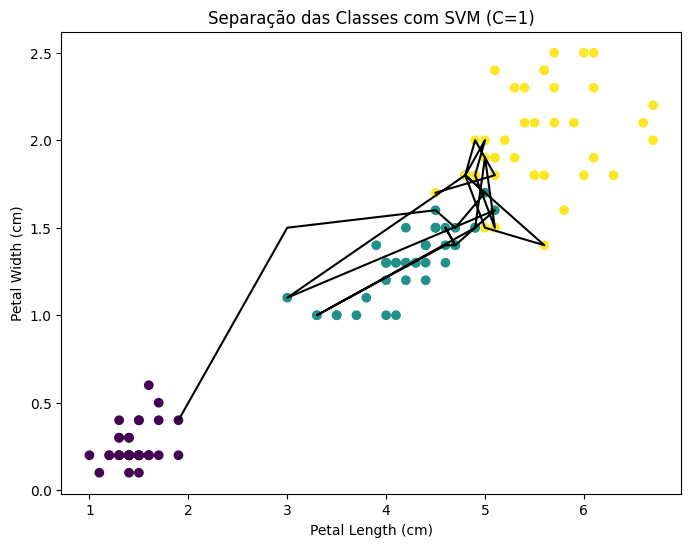

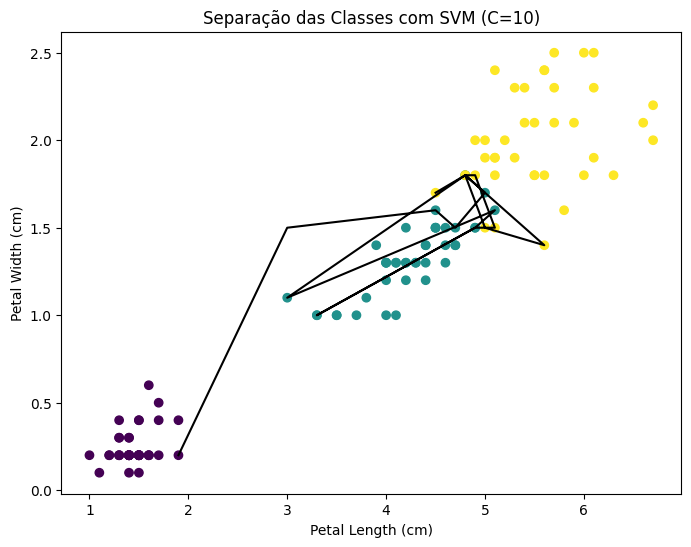

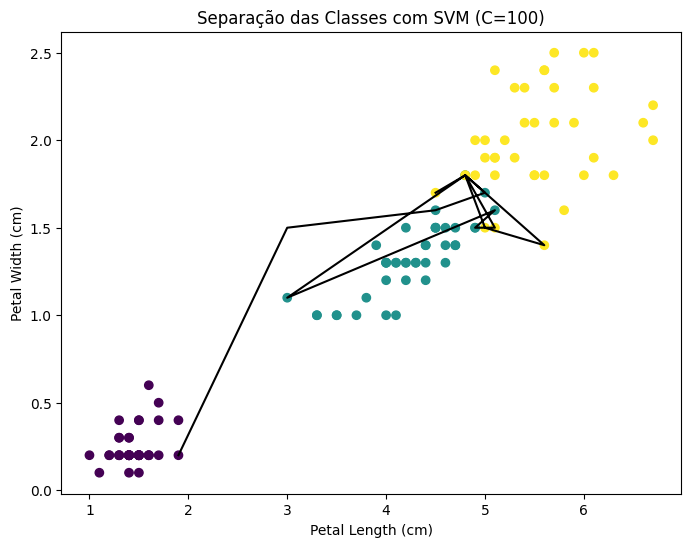

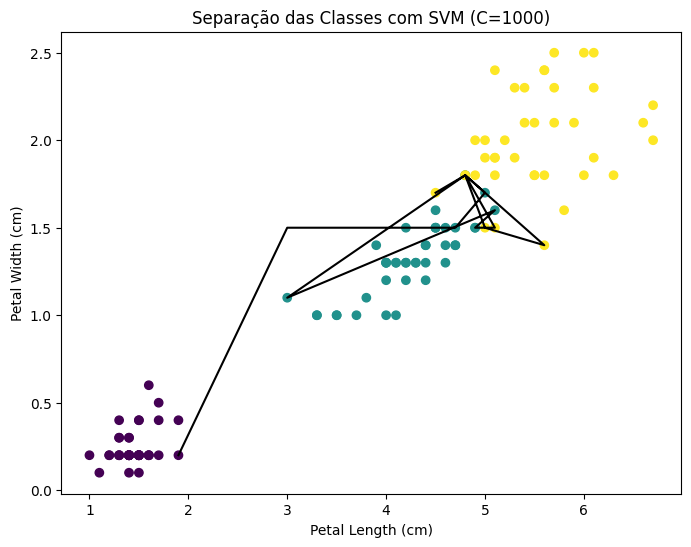

In [65]:

# Criando um gráfico 2D para visualizar a separação das classes
plt.figure(figsize=(8, 6))

# Plotando a fronteira de separação do modelo com C=1
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.plot(svm_soft_1.support_vectors_[:, 0], svm_soft_1.support_vectors_[:, 1], 'k-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM (C=1)')
plt.show()

# Plotando a fronteira de separação do modelo com C=10
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.plot(svm_soft_10.support_vectors_[:, 0], svm_soft_10.support_vectors_[:, 1], 'k-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM (C=10)')
plt.show()

# Plotando a fronteira de separação do modelo com C=100
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.plot(svm_soft_100.support_vectors_[:, 0], svm_soft_100.support_vectors_[:, 1], 'k-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM (C=100)')
plt.show()

# Plotando a fronteira de separação do modelo com C=1000
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.plot(svm_soft_1000.support_vectors_[:, 0], svm_soft_1000.support_vectors_[:, 1], 'k-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM (C=1000)')
plt.show()

##<b>2.3. Comentário:</b>

<p align="justify">&emsp;<b><font size=3 color=#881100>O aumento do valor de C tornou a margem suave mais rígida, então teve uma proximidade do comportamento existente no caso do SVM de margens rígidas. Se C é altíssima (1000) existe uma semelhança com o modelo de margens rígidas porque a penalização por erros de classificação é bastante elevada.
</font></b>

#<b>3. Ajuste do modelo SVM não lineares:</b>

##<b>3.1. Ajuste do SVN não linear - kernel polinomial:</b>

In [60]:
# Ajustando modelo de SVM não linear com Kernel Polinomial
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train_new, y_train_new)

SVC(degree=2, kernel='poly')

##<b>3.2. Ajuste do SVM não linear - Kernel Gaussiano:</b>

In [62]:
# Ajustando modelo de SVM não linear com Kernel Gaussiano
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train_new, y_train_new)

SVC(C=1, gamma=1)

##<b>3.3. Desenhar gráfico(s):</b>

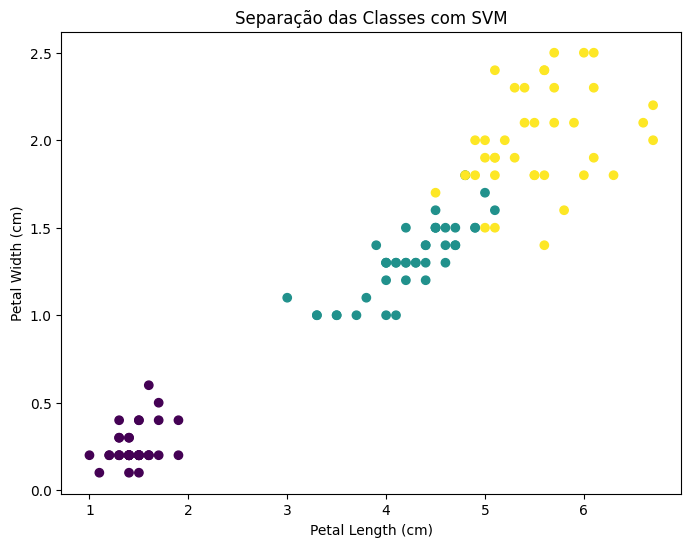

In [64]:
# Criando um gráfico 2D para visualizar a separação das classes
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Separação das Classes com SVM')
plt.show()

##<b>3.3. Comentário:</b>

<p align="justify">&emsp;<b><font size=3 color=#881100>Com o Kernel Polinomial, o hiperplano de separação se torna não linear, permitindo que o modelo capture padrões mais complexos nos dados. Já com o Kernel Gaussiano, o hiperplano de separação assume uma forma mais flexível e curva, adaptando-se melhor à distribuição dos dados.
</font></b></p>

#<b>4. Ajuste de modelo de SVM não linear com Kernel Gaussiano:</b>

##<b>4.1. Ajustando modelos de SVM não linear com Kernel Gaussiano:</b>

In [67]:
# Ajustando modelos de SVM não linear com Kernel Gaussiano
svm_rbf_01 = SVC(kernel='rbf', gamma=0.1, C=1)
svm_rbf_01.fit(X_train_new, y_train_new)

svm_rbf_1 = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf_1.fit(X_train_new, y_train_new)

svm_rbf_10 = SVC(kernel='rbf', gamma=10, C=1)
svm_rbf_10.fit(X_train_new, y_train_new)

SVC(C=1, gamma=10)

##<b>4.2. Gerar Gráfico(s):</b>

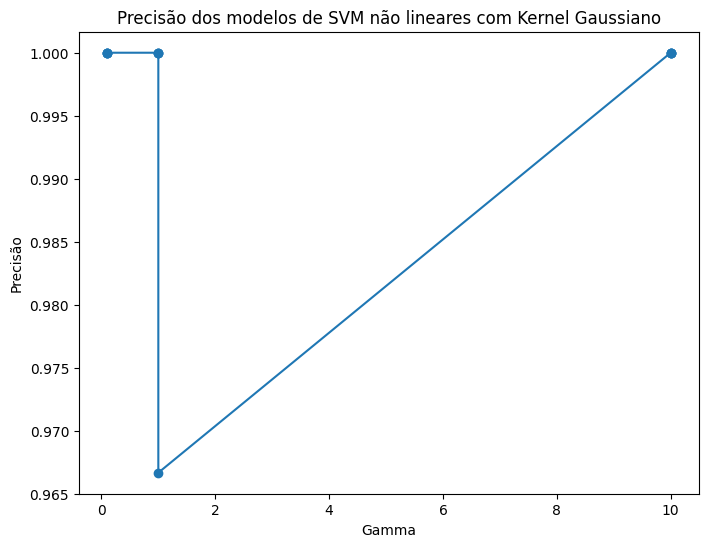

In [81]:
# Carregando o dataset Iris
iris = load_iris()
X = iris.data[:, [2, 3]]  # Usando apenas as variáveis 'petal length in cm' e 'petal width in cm'
y = iris.target

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando modelos de SVM não lineares com Kernel Gaussiano
gammas = [0.1, 1, 10]
C_values = [1, 10, 100, 1000]
scores = []

for gamma in gammas:
    for C in C_values:
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svm_rbf.fit(X_train, y_train)
        scores.append(svm_rbf.score(X_test, y_test))

# Gerando gráfico de precisão para os modelos de SVM não lineares com Kernel Gaussiano
plt.figure(figsize=(8, 6))
x_values = []
for gamma in gammas:
    x_values.extend([gamma] * len(C_values))
plt.plot(x_values, scores, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Precisão')
plt.title('Precisão dos modelos de SVM não lineares com Kernel Gaussiano')
plt.show()

##<b>4.3. Comentário:</b>

<p align="justify">&emsp;<b><font size=3 color=#881100>Ao aumentando o valor de gamma torna esse SVM mais sensível as pequenas variações de dados. Assim, um hiperplano/reta de separação mais complexo foi ajustado. Se ocorrer overfitting, o desempenho para novos dados pode ser ruim.</font></p>

<p align="justify">&emsp;<b><font size=3 color=#881100>Por outro lado, um aumento do valor de C trona esse SVM mais rígido, ou seja, terá margem de separação menor e ficando perto SVM com margens rígidas.
</font></b></p>

<p align="justify">&emsp;

</p>
